In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.plotting import table

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
current_data = session.query(func.max(Measurement.date)).first()[0]
current_data

'2017-08-23'

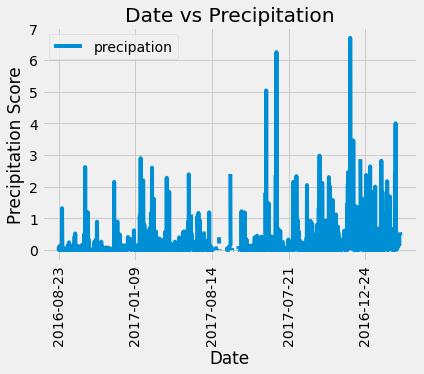

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_date= dt.date(2017,8,23)

one_year = dt.timedelta(days=365)
prior_year = previous_date - one_year

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= prior_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_scores, columns=['date','precipation'])

# Sort the dataframe by date
percipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='precipation',rot= 90)

plt.xlabel('Date')
plt.ylabel('Precipitation Score')
plt.title('Date vs Precipitation')
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.name)).all()[0][0]
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
busy_stations= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
busy_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp_stations = session.query(func.max(Measurement.tobs)).all()[0][0]
print(max_temp_stations)

87.0


In [17]:
min_temp_stations = session.query(func.min(Measurement.tobs)).all()[0][0]
print(min_temp_stations)

53.0


In [18]:
avg_temp_stations = session.query(func.avg(Measurement.tobs),2).all()[0][0]
print(avg_temp_stations)

73.09795396419437


In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_date= dt.date(2017,8,23)

one_year = dt.timedelta(days=365)
prior_year = previous_date - one_year

active_stations = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prior_year).all()
active_stations_df = pd.DataFrame(active_stations)


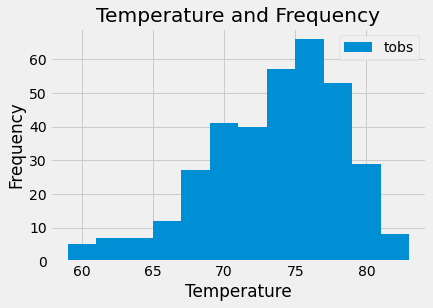

In [30]:
plt.title('Temperature and Frequency')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.hist(active_stations_df, bins=12)
plt.legend(['tobs'], loc= 'upper right')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()